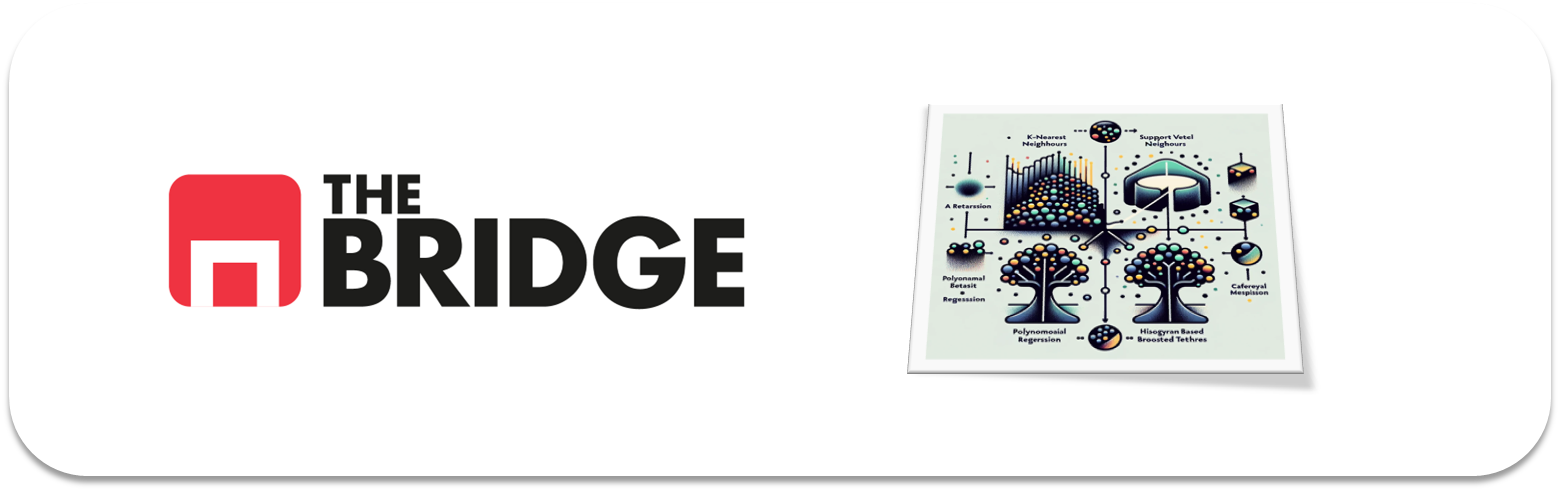

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, roc_curve, auc

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
data = pd.read_csv("data/credit_npo.csv")

data.sample(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11480,1,0.873128,34,0,1.963102,2655.0,11,0,0,0,2.0
1679,0,0.322585,46,1,0.323842,2633.0,12,0,1,0,2.0
761,0,0.118610,49,0,0.418254,13333.0,11,0,1,0,2.0
7523,0,0.000000,80,0,1.000000,NaN,3,0,0,0,0.0
11356,0,0.568993,47,0,0.548281,7300.0,17,0,3,0,0.0
4145,0,0.320808,59,0,0.486814,8000.0,14,0,2,0,5.0
7413,0,0.451095,59,0,0.440731,7600.0,19,0,1,0,3.0
5790,0,0.436736,44,0,0.337155,7500.0,5,0,2,0,2.0
8547,0,0.757078,37,1,0.594705,5400.0,7,0,2,0,3.0
9279,0,1.000000,44,0,0.004805,2080.0,1,0,0,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


### Descripción de las variables:

| Variable | Descripción  |
|---|---|
| SeriousDlqin2yrs | Dificultades financieras tras 2 años. Nuestra variable objetivo (target). Binaria. |
| RevolvingUtilizationOfUnsecuredLines | Ratio de crédito usado sobre el límite establecido. Numérica continua. |
| age | Edad en años. Numérica discreta. |
| NumberOfTime30-59DaysPastDueNotWorse | Número de ocasiones en las que se ha debido un dinero durante 30 días o más pero menos de 60. Numérica discreta. |
| DebtRatio | Cuota mensual de deuda sobre el ingreso mensual. Numérica continua.  |
| MonthlyIncome | Ingresos mensuales. Numérica continua. |
| NumberOfOpenCreditLinesAndLoans | Número de préstamos y líneas de crédito sin amortizar. Numérica discreta. |
| NumberOfTimes90DaysLate | Número de ocasiones en las que se ha debido un dinero durante 90 días o más. Numérica discreta. |
| NumberRealEstateLoansOrLines | Número de préstamos hipotecarios. Numérica discreta. |
| NumberOfTime60-89DaysPastDueNotWorse | Número de ocasiones en las que se ha debido un dinero durante 60 días o más pero menos de 90. Numérica discreta. |
| NumberOfDependents | Número de familiares dependientes. Numérica discreta. |

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Clasificación. SeriousDlqin2yrs.

In [5]:
target = 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

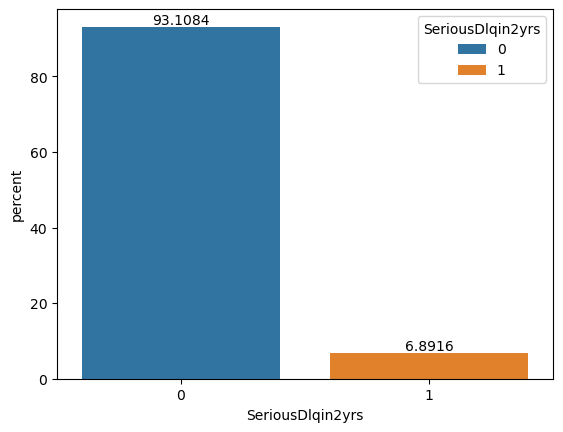

In [6]:
ax = sns.countplot(data=data, x=target, hue=target, stat='percent')
for container in ax.containers:
    ax.bar_label(container)

Distribución muy marcadamente desbalanceada: 7% de positivos vs 93% de negativos.

In [7]:
# Tratamiento de nulos

# Para MonthlyIncome, imputo la mediana. Luego me cargo las filas con nulos en NumberOfDependants, ya que tenemos muchos datos y supone perder un porcentaje muy pequeñito solo.

data.MonthlyIncome = data.MonthlyIncome.fillna(data.MonthlyIncome.median())

data.dropna(inplace=True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [8]:
# Split

train_set, test_set = train_test_split(data, test_size= 0.1, random_state= 42)

En vez de hacer mini-EDA como en las prácticas anteriores, voy a entrenar un árbol de decisión y a guiarme por la contribución de cada feature

In [9]:
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]

X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

In [10]:
# Empiezo entrenando un árbol de decisión, aprovechando la funcionalidad de feature contribution

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
for x in sorted(zip(X_train.columns, tree_clf.feature_importances_), key=lambda x: 1-x[1]): print(x)

('DebtRatio', 0.1896436132045985)
('RevolvingUtilizationOfUnsecuredLines', 0.16919146926894835)
('MonthlyIncome', 0.16708654224019726)
('NumberOfTimes90DaysLate', 0.14267333151819833)
('age', 0.11897400911841084)
('NumberOfOpenCreditLinesAndLoans', 0.08540130040632792)
('NumberOfTime30-59DaysPastDueNotWorse', 0.035532166240640345)
('NumberOfDependents', 0.030595855092653442)
('NumberOfTime60-89DaysPastDueNotWorse', 0.03055386689926341)
('NumberRealEstateLoansOrLines', 0.030347846010761577)


In [12]:
features = [feature for feature, weight in zip(X_train.columns, tree_clf.feature_importances_) if weight > 0.05]

features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate']

In [13]:
# Ya que estamos, evaluamos este modelo:

print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1139
           1       0.21      0.20      0.20        97

    accuracy                           0.88      1236
   macro avg       0.57      0.57      0.57      1236
weighted avg       0.88      0.88      0.88      1236



Como vemos, es muy pobre prediciendo la clase 1

In [14]:
# Filtramos los datasets en base a la selección que hemos hecho

X_train = X_train[features]
X_test = X_test[features]

In [15]:
# Recall medio con cross_val con el test de entrenamiento:

np.mean(cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='balanced_accuracy'))

0.5968357731902623

In [16]:
# Para el resto de modelos puedo necesitar escalado:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test[X_train.columns]), columns= X_train.columns)

In [17]:
# Hacemos over-sampling con SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
# Volvemos a entrenar y evaluar nuestro árbol de decisión

tree_clf.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1139
           1       0.20      0.31      0.24        97

    accuracy                           0.85      1236
   macro avg       0.57      0.60      0.58      1236
weighted avg       0.88      0.85      0.86      1236



El recall de la clase positiva sube bastante a costa del recall de la clase negativa.

In [19]:
# Entrenamos y evaluamos un Random Forest

forest_clf = RandomForestClassifier(max_depth=5, random_state=42)

forest_clf.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, forest_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1139
           1       0.19      0.72      0.30        97

    accuracy                           0.74      1236
   macro avg       0.58      0.73      0.57      1236
weighted avg       0.91      0.74      0.80      1236



In [20]:
# Entrenamos y evaluamos un KNN

knn = KNeighborsClassifier()

knn.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1139
           1       0.19      0.53      0.28        97

    accuracy                           0.79      1236
   macro avg       0.57      0.67      0.58      1236
weighted avg       0.89      0.79      0.83      1236



Decision Tree AUROC: 0.60
Random Forest AUROC: 0.81
KNN AUROC: 0.70


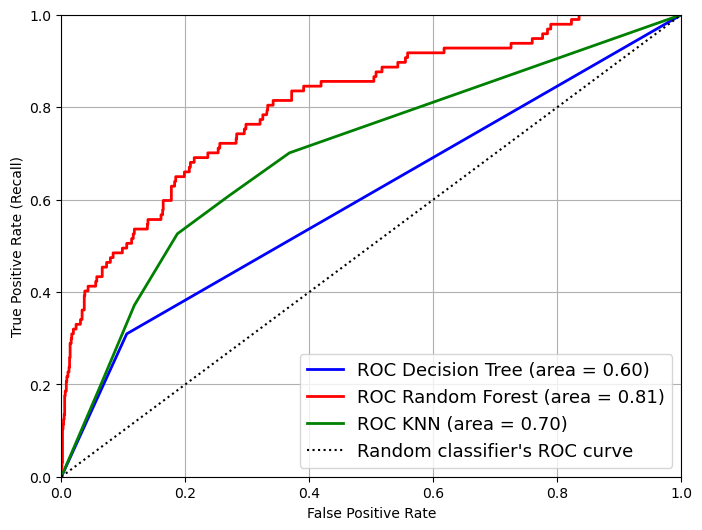

In [21]:
scores1 = tree_clf.predict_proba(X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, scores1[:,1])
roc_auc1 = auc(fpr1,tpr1)

scores2 = forest_clf.predict_proba(X_test)
fpr2, tpr2, thresholds = roc_curve(y_test, scores2[:,1])
roc_auc2 = auc(fpr2,tpr2)

scores3 = knn.predict_proba(X_test)
fpr3, tpr3, thresholds = roc_curve(y_test, scores3[:,1])
roc_auc3 = auc(fpr3,tpr3)

plt.figure(figsize=(8, 6))  
plt.plot(fpr1, tpr1, linewidth=2, color= "blue", label=f"ROC Decision Tree (area = {roc_auc1:0.2f})")
plt.plot(fpr2, tpr2, linewidth=2, color= "red", label=f"ROC Random Forest (area = {roc_auc2:0.2f})")
plt.plot(fpr3, tpr3, linewidth=2, color= "green", label=f"ROC KNN (area = {roc_auc3:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

print("Decision Tree AUROC: %.2f" %(roc_auc1))
print("Random Forest AUROC: %.2f" %(roc_auc2))
print("KNN AUROC: %.2f" %(roc_auc3))

Random Forest nos ofrece las mejores métricas entre los 3 modelos, especialmente en cuanto al recall de los positivos.

In [32]:
# Optimización

param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'min_samples_leaf' : [1, 10, 20],
    'max_features' : ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(forest_clf, param_grid=param_grid, cv=6, scoring = "balanced_accuracy", n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=6,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='balanced_accuracy')

In [33]:
grid_search.best_params_

{'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}

In [34]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1139
           1       0.20      0.63      0.30        97

    accuracy                           0.77      1236
   macro avg       0.58      0.71      0.58      1236
weighted avg       0.90      0.77      0.82      1236



El weighted avg recall nos sube, pero el recall de 1 nos baja.

Decision Tree AUROC: 0.60
Random Forest AUROC: 0.81
KNN AUROC: 0.70
Random Forest (GridSearch.best_estimator_): 0.79


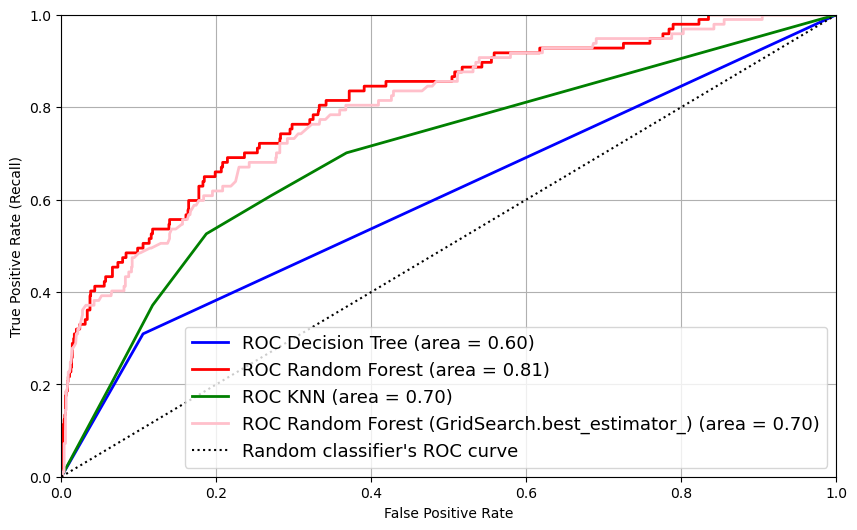

In [36]:
scores4 = grid_search.best_estimator_.predict_proba(X_test)
fpr4, tpr4, thresholds = roc_curve(y_test, scores4[:,1])
roc_auc4 = auc(fpr4,tpr4)

plt.figure(figsize=(10, 6))  
plt.plot(fpr1, tpr1, linewidth=2, color= "blue", label=f"ROC Decision Tree (area = {roc_auc1:0.2f})")
plt.plot(fpr2, tpr2, linewidth=2, color= "red", label=f"ROC Random Forest (area = {roc_auc2:0.2f})")
plt.plot(fpr3, tpr3, linewidth=2, color= "green", label=f"ROC KNN (area = {roc_auc3:0.2f})")
plt.plot(fpr4, tpr4, linewidth=2, color= "pink", label=f"ROC Random Forest (GridSearch.best_estimator_) (area = {roc_auc3:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

print("Decision Tree AUROC: %.2f" %(roc_auc1))
print("Random Forest AUROC: %.2f" %(roc_auc2))
print("KNN AUROC: %.2f" %(roc_auc3))
print("Random Forest (GridSearch.best_estimator_): %.2f" %(roc_auc4))

Resultados muy similares tras optimización.